In [1]:
!pip3 install pandas scikit-learn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# import

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Load  synthetic datset

In [3]:
DATAPATH = "./data"

In [4]:
synthetic_train_path = f"{DATAPATH}/synthetic_data_train.txt"
synthetic_test_path = f"{DATAPATH}/synthetic_data_test.txt"

In [5]:
synthetic_train_df = pd.read_csv(synthetic_train_path, names=['x','y','z','class'])
synthetic_test_df = pd.read_csv(synthetic_test_path, names=['x','y','z','class'])

In [6]:
synthetic_train_df

,x,y,z,class
0,0.117,-7.821,1.979,0
1,-2.081,-5.047,3.479,1
2,-9.497,9.203,3.679,1
3,-2.541,2.651,3.534,1
4,-18.408,-5.665,3.337,1
...,...,...,...,...
1995,-1.163,5.595,3.279,1
1996,0.789,-7.555,3.467,1
1997,-2.772,-6.834,2.222,0
1998,0.465,-9.213,2.405,0


In [7]:
synthetic_train_x = synthetic_train_df[['x','y','z']].values
synthetic_train_y = synthetic_train_df[['class']].values.reshape(-1)
synthetic_test_x = synthetic_test_df[['x','y','z']].values
synthetic_test_y = synthetic_test_df[['class']].values.reshape(-1)

print('synthetic_train_x : ', synthetic_train_x.shape)
print('synthetic_train_y : ', synthetic_train_y.shape)
print('synthetic_test_x : ', synthetic_test_x.shape)
print('synthetic_test_y : ', synthetic_test_y.shape)

synthetic_train_x :  (2000, 3)
synthetic_train_y :  (2000,)
synthetic_test_x :  (400, 3)
synthetic_test_y :  (400,)


In [8]:
scaler = MinMaxScaler()

normalization_synthetic_train_x = scaler.fit_transform(synthetic_train_x)
normalization_synthetic_test_x = scaler.fit_transform(synthetic_test_x)

# Load  Real datset

In [9]:
real_train_path = f"{DATAPATH}/datatraining.txt"
real_test_path = f"{DATAPATH}/datatset2.txt"

In [10]:
real_train_df = pd.read_csv(real_train_path)
real_test_df = pd.read_csv(real_test_path)

In [11]:
real_train_df

,number,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...,...
8138,8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8139,8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8140,8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8141,8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [12]:
real_train_x = real_train_df[['Temperature','Light','CO2']].values
real_train_y = real_train_df[['Occupancy']].values.reshape(-1)
real_test_x = real_test_df[['Temperature','Light','CO2']].values
real_test_y = real_test_df[['Occupancy']].values.reshape(-1)

print('real_train_x : ', real_train_x.shape)
print('real_train_y : ', real_train_y.shape)
print('real_test_x : ', real_test_x.shape)
print('real_test_y : ', real_test_y.shape)

real_train_x :  (8143, 3)
real_train_y :  (8143,)
real_test_x :  (9752, 3)
real_test_y :  (9752,)


In [13]:
scaler = MinMaxScaler()

normalization_real_train_x = scaler.fit_transform(real_train_x)
normalization_real_test_xx = scaler.fit_transform(real_test_x)

# Perceptron

In [14]:
class perceptron:
    def __init__(self, feature=3):
        self.w = np.zeros(feature)
        self.b = 0
    
    def forward(self, x):
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.forward(x) > 0, 1, 0)
    
    def fit(self, epochs, train=None, learing_rate=0.01):
        predicts = []
        
        for epoch in range(epochs):
            # train
            for x, y in zip(train[0],train[1]):
                update = learing_rate * (y - self.predict(x))
                self.w += update * x
                self.b += update
            
            # count
            count = 0
            for x, y in zip(train[0],train[1]):
                if(self.predict(x) != y):
                    count += 1
            predicts.append(count)
        return predicts

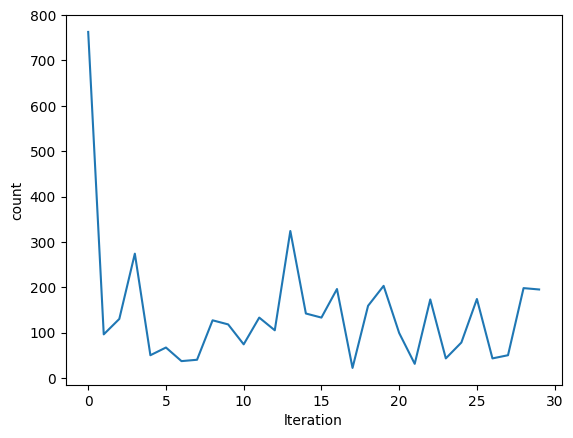

In [15]:
synthetic_p = perceptron(feature=3)
history = synthetic_p.fit(30, train=(synthetic_train_x, synthetic_train_y), learing_rate=0.001)
plt.plot(history)
plt.xlabel('lteration')
plt.ylabel('count')
plt.show()

In [23]:
synthetic_y_predict = []

for x in synthetic_test_x:
    synthetic_y_predict.append(int(synthetic_p.predict(x)))
    
confusion_matrix_result = confusion_matrix(synthetic_test_y, synthetic_y_predict)
print(confusion_matrix_result)

[[182  18]
 [ 24 176]]


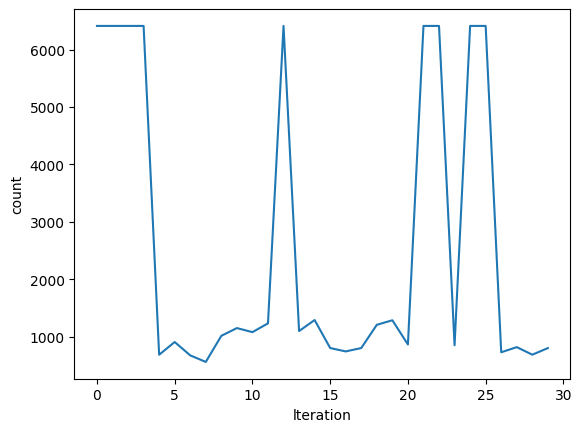

In [25]:
real_p = perceptron(feature=3)
history = real_p.fit(30, train=(real_train_x, real_train_y), learing_rate=0.001)
plt.plot(history)
plt.xlabel('lteration')
plt.ylabel('count')
plt.show()

In [27]:
real_y_predict = []

for x in real_test_x:
    real_y_predict.append(int(real_p.predict(x)))
    
confusion_matrix_result = confusion_matrix(real_y_predict, real_test_y)
print(confusion_matrix_result)

[[6729    2]
 [ 974 2047]]
